# Task 1:
## Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [3]:
X = data[:,:-1]
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [4]:
ones = np.ones((X.shape[0],1))
X = np.concatenate((ones, X), axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [5]:
y = data[:,-1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### new to build a function that train an adam optimizer for multivariable 
### we need function to calc the mse, the gradient, momentum, adaptive learning rate, and one for all training process

In [256]:
def MSE(error):
    # 1/m * sum (yhat(i)-y(i))^2
    error = error.reshape(-1)
    return np.dot(error,error)/(2*len(error))

In [257]:
def gradient(error,X):
    # m*1  n*m
    return np.matmul(X.T,error)/X.shape[0]


In [258]:
def update_theta(theta_vec, m_hat, v_hat, alpha, EPS):
    return theta_vec - (alpha/(np.sqrt(v_hat)+EPS))*m_hat

In [259]:
def momentum(m,gradients,beta):
    mom_vec = beta*m + (1-beta)*gradients
    return mom_vec

In [260]:
def adlr(v,gradients,gamma):
    return gamma*v + (1-gamma)*(gradients**2)

In [261]:
def shuffle_Date(X,y):
    data = np.concatenate((X,y),axis=1)
    np.random.shuffle(data)
    X = data[:,:-1]
    y = data[:,-1]
    return X,y 

In [262]:
X.shape

(25, 4)

In [301]:
def SGDoptimizer(X,y,epochs=100,BS=16,alpha=0.0001,beta=0.9,gamma=0.9,EPS=1e-8,shuffle=True):
    n, m = X.shape[1], X.shape[0]
    iter = m//BS
    print(iter)
    theta_Vector = np.zeros((n,1))
    losses = []
    thetas = []
    if BS > m:
        BS = m
    # bathcsize = 5 then each 25/5 5 losses each epoch then I WANT TO SEE IF THE LAST LOSS WILL BE LARGE THAN 0
    # 9 LOSS EQUAL 4
    # 14 EQUAL 9
    for i in range(epochs):
        cnt = i + 1
        X_shuffled, y_shuffled= shuffle_Date(X,y)
        mom = np.zeros((n,1))
        v = np.zeros((n,1))
        for j in range(iter):
            X_batch, y_batch = X_shuffled[j*BS:(j*BS)+BS,:], y_shuffled[j*BS:(j*BS)+BS].reshape(-1,1)
            hx = np.matmul(X_batch,theta_Vector)
            error = hx - y_batch
            mse = MSE(error=error)
            gradients_vector = gradient(error=error,X=X_batch)
            mom = momentum(mom,gradients_vector,beta=beta)
            v = adlr(v,gradients_vector,gamma)
            m_hat = mom / (1-(beta**cnt))
            v_hat = v / (1-(gamma**cnt))
            theta_Vector = update_theta(theta_Vector,m_hat,v_hat,alpha,EPS)
            losses.append(mse)
            thetas.append(theta_Vector)
        # if i > 0 and abs(losses[(iter*i)]) - losses[-1] < 0.0001:
        #     print(len(losses))
        #     break
        if np.linalg.norm(gradients_vector) < 0.0001:
            break

    return losses, thetas

In [302]:
y = y.reshape(-1,1)

In [315]:
losses, thetas = SGDoptimizer(X,y,epochs=10000,BS=1,alpha=0.001,beta=0.99,gamma=0.99)

25


In [316]:
losses[-1]

27.695446813430713

In [317]:
from sklearn.metrics import r2_score
r2_score(y,np.matmul(X,thetas[-1]))

0.9892823822317884

In [140]:
losses2, thetas2 = SGDoptimizer(X,y,epochs=100000,BS=25,alpha=0.0001,beta=0.99,gamma=0.99)

1
76727


In [141]:
losses3, thetas3 = SGDoptimizer(X,y,epochs=10000,BS=25,alpha=0.01,beta=0.99,gamma=0.99)

1
553


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


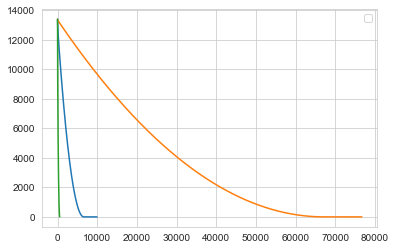

In [155]:
plt.plot(losses)
plt.plot(losses2)
plt.plot(losses3)
plt.legend()

In [149]:
losses[-1], losses2[-1], losses3[-1]

(3.2802012299281866, 4.918039569039676, 6.018113773926634)

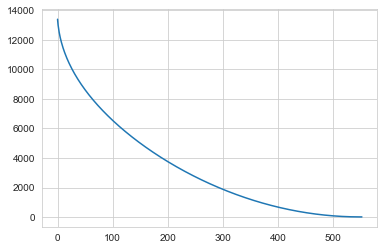

In [60]:
plt.plot(losses3)

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>